In [1]:
import networkx as nx
import graphviz

# Background

1. We collect lots of metrics using the acm-inspector.
1. We rely on a subset of those metrics to project [acm sizes](https://github.com/stolostron/capacity-planning) for green field capacity planning exercises.
1. Another subset of those metrics help us to determine if the running ACM instance - brown field - is able to handle its current fleet without any issue.

In this document we explore the rationale of why we use the metrics we use, how are they related to each other and how the `knowledge of the way ACM works` is deeply related to all of these. We explore this through a series of equations.

This document is split into 3 sections

1. Capacity Planning - Green Field, Ideal Scenario
1. Capacity Planning - Green Field, Practical Scenario
1. Performance Analysis - on a running ACM 




## Capacity Planning - Green Field, Ideal Scenario

We list below a series of equations which needs to be solved to arrive at correct sizing decisions. The left hand side of these equations are the `dependendent variables` - aka what we want to measure or derive. And the right hand side variables drive to provide the answer. These are called `independent variables`.

We call this ideal because you will notice that some of these `independent variables`below cannot be measured or is very hard to quantify. You will also notice that unless we make some approximations, the number of observations needed to do a robust calculation will be unbounded - hence not practical. We will be explaining these more in details under the following section `Capacity Planning - Practical Scenario`.

Logically these `dependent variables` should be causally related to the `independent variables` - but for the purposes of practicality, we may have to make some simplifications/assumptions etc.

<!--
### Observability

- $Obs-size-for-thanos = \mathbf{f}(number-of-managed-clusters, time-series-per-cluster^1)$
- $Obs-size-for-mco = \mathbf{f}(number-of-managed-clusters)$

### GRC

- $Policy-size-for-controllers = \mathbf{f}(number-of-managed-clusters, policy-count-per-cluster^1,policy-complexity^2,frequency-of-status-changes)$

### Kube API /Etcd Server

- $KubeAPI-size^3 = \mathbf{f}(total-resources-created, frequency-of-resource-change, number-of-get-requests)$
- $total-resources-created = \mathbf{f}(number-of-managed-clusters, acm-features-enabled, acm-release)^4$
- $number-of-get-requests = \mathbf{f}(number-of-managed-clusters, acm-features-enabled, acm-release)^4$
- $Etcd-size = \mathbf{f}(total-resources-created, frequency-of-resource-change)$

Notes:

1. For sake of Green field Capacity planning we do assume that policies or time series is uniform across all managed clusters.
1. Policy complexity is hard to express numerically
1. This assumes there is no other external systems running on the Hub Server aside of ACM that can have impact on the Kube API Server
1. Changes between ACM release can affect how many resources are created on KubeAPI Server and how many calls are being made to it.
--->

### Observability

__Obs-size-for-thanos is a vector__


<mark>
$\mathbf{Obs-size-for-thanos} = \begin{bmatrix} CPUForAllThanosPods \\\ MemoryForAllThanosPods \\\ StorageForAllThanos  \end{bmatrix}$
</mark>


An estimation model looks like - 

<mark>
$\mathbf{Obs-size-for-thanos} = \mathbf{f}(number-of-managed-clusters, time-series-per-cluster^1)$
</mark>


__Obs-size-for-mco is a vector__

<mark>
$\mathbf{Obs-size-for-mco} = \begin{bmatrix} CPUForMCOPod \\\ MemoryForMCOPod  \end{bmatrix}$
</mark>

An estimation model looks like -

<mark>
$\mathbf{Obs-size-for-mco} = \mathbf{f}(number-of-managed-clusters)$
</mark>


Notes:

1. For sake of Green field Capacity planning we do assume that policies or time series is uniform across all managed clusters.


### GRC


__policy-size-for-controllers is a vector__

<mark>
$\mathbf{policy-size-for-controllers} = \begin{bmatrix} CPUForAllPolicyControllerPods \\\ MemoryForAllPolicyControllerPods  \end{bmatrix}$
</mark>

An estimation model looks like - 

<mark>
$\mathbf{policy-size-for-controllers} = \mathbf{f}(number-of-managed-clusters, policy-count-per-cluster^1,policy-complexity^2,frequency-of-status-changes)$
</mark>

Notes:

1. For sake of Green field Capacity planning we do assume that policies or time series is uniform across all managed clusters.
1. Policy complexity is hard to express numerically

### Kube API /Etcd Server


__KubeAPI-size is a vector__

<mark>
$\mathbf{KubeAPI-size} = \begin{bmatrix} CPUForAllAPIServerPods \\\ MemoryForAllAPIServerPods  \end{bmatrix}$
</mark>

An estimation model looks like - 

<mark>
$\mathbf{KubeAPI-size^1} = \mathbf{f}(total-resources-created, frequency-of-resource-change, number-of-get-requests)$
</mark>
    
__apiserver-load is a vector__

<mark>
$\mathbf{apiserver-load} = \begin{bmatrix} total-resources-created \\\ number-of-get-requests  \end{bmatrix}$
</mark>

An estimation model looks like - 

<mark>
$\mathbf{apiserver-load} = \mathbf{f}(number-of-managed-clusters, acm-features-enabled, acm-release)^2$
</mark>

__Etcd-size is a vector__

<mark>
$\mathbf{Etcd-size} = \begin{bmatrix} CPUForAllEtcdPods \\\ MemoryForAllEtcdPods  \end{bmatrix}$
</mark>

An estimation model looks like - 

<mark>
$\mathbf{Etcd-size} = \mathbf{f}(total-resources-created, frequency-of-resource-change)$
</mark>


Notes:

1. This assumes there is no other external systems running on the Hub Server aside of ACM that can have impact on the Kube API Server
1. Changes between ACM release can affect how many resources are created on KubeAPI Server and how many calls are being made to it.

## Capacity Planning - Green Field, Practical Scenario

As mentioned above, some of these `independent variables`below cannot be measured or is very hard to quantify. You will also notice that unless we make some approximations, the number of observations needed to do a robust calculation will be unbounded - hence not practical. Therefore we will make some changes to the above equations.


### Observability

__Obs-size-for-thanos is a vector__


<mark>
$\mathbf{Obs-size-for-thanos} = \begin{bmatrix} CPUForAllThanosPods \\\ MemoryForAllThanosPods \\\ StorageForAllThanos  \end{bmatrix}$
</mark>


An estimation model looks like - 

<mark>
$\mathbf{Obs-size-for-thanos} = \mathbf{f}(number-of-managed-clusters, time-series-per-cluster^1)$
</mark>

This calculation exists [here](https://github.com/stolostron/capacity-planning/blob/main/calculation/ObsSizingTemplateGivenTimeSeriesCount-Rev1.ipynb).

In the grand scheme of things, __Obs-size-for-mco__ is small enough and is factored in the markups.


Notes:

1. For sake of Green field Capacity planning we do assume that policies or time series is uniform across all managed clusters.

### GRC

If the only load on the ACM Hub is ACM Policies - as assumed in calculations - then the impact of the policies is felt by:
- Pods running in the ACM set of namespaces
- Pods running in KubeAPI Server namespace
- Pods running in etcd namespace

True that in the ACM namespaces there are other pods that are running which has nothing to do with GRC framework. But their overall impact is little compared to the KubeAPI and etcd. Also, for purposes of estimation, all it means is we go a little higher/safer. Of course when we say ACM Pods, we do exclude the Observability pods - which run under `open-cluster-management-observability` namespace.

So, taking into account the above factors we can conclude:

__policy-effect is a vector__

<mark>
$\mathbf{policy-effect} = \begin{bmatrix} CPUForAllACMPods \\\ MemoryForAllACMPods \\\ CPUForAllAPIServerPods \\\ MemoryForAllAPIServerPods \\\ CPUForAllEtcdPods \\\ MemoryForAllEtcdPods  \end{bmatrix}$
</mark>

An estimation model looks like - 

<mark>
$\mathbf{policy-effect} = \mathbf{f}(number-of-managed-clusters, policy-count-per-cluster^1)$
</mark>

Once automation is created to run the tests and gather data that can be used to solve these equations:
- the policy complexity is fixed
- the frequency of status changes is fixed (it is a part of the changes that are injected by the automation)
- the total number of resources that are created is fixed
- the total number of get requests to the kube api server is fixed

Notes:

1. For sake of Green field Capacity planning we do assume that policies or time series is uniform across all managed clusters.

### Limitations

1. So how do we take into account policy complexity? We do not. Instead we run the tests using a policy which we think will be generally conservative. So why dont we change the policies and re-run the tests keeping everything the same? Because this hard from the perspective of running these tests. The number of tests start getting very large.
1. Ignoring the policy complexity issue for now, if we are to really solve: $\mathbf{policy-effect} = \mathbf{f}(number-of-managed-clusters, policy-count-per-cluster)$ we would need to have recordings taken at various managed cluster count as well as various policy count. These result in a large number of runs which are yet to conduct. 
1. Therefore it makes hard to conclusively solve this equation - like we have done for the case of observability. We have data, but on top of that, we infuse human judgement/experience to draw conclusions.


## Performance Analysis - on a running ACM 

The goals are very different here. It is not about estimating the size of ACM Hub in a greenfield application. Now we have a running ACM hub. A set of managed clusters are connected to it. And a set of ACM features like GRC, Observability are enabled. Question to answer is - is my system approaching some kind of limit which may not manifest itself simply in CPU, Memory consumption. It may be responding slower, it may be dropping data or there could be other manifestations. The question `do we need to add more capacity` can be approached now with much more details. We never had the luxury of those details when we sized for green field.

Based on our understanding of the system, you will also notice that a small cluster of metrics needs to be analyzed together to derive a sub system health. And those sub system healths inform us about the overall health. These functions that derive a sub system health could be a regression model, it could be a classification model or it could be a simple if-then-else statement. But we are basical building a causal model here from bottoms up. Stated another way, we again approach by trying to model the system through a set of equations. But here the `dependent variables` and `independent variables` are strongly causally related.

A `subtle point` :
- there are health indicators/symptoms/effects: is-todo-compaction-growing, kube-api-server-latency etc. Appropriate alerts, if existing, could work as health indicators of the system as well. The term appropriate here means that these alerts must specifically target the health of the sub system we are modeling. 
- there are causes that dictate the health: is-todo-compaction-growing, total-resources-created, frequency-of-resource-change etc. There also could be deeper level causes which we cannot measure or see.

These are the underpinnings of a causal model. You will also notice a causal chaining effect. Kube API Server health is dependent on etcd health etc. The alert storms that we get are due to these chaining effects.

### Solution

There are numerous ways to solve this. Minimally we should know -
1. the topology (as we are detailing here)
1. alerts (as we have for observability framework) or being able to calculate warning signs from metrics (as we have for GRC framework) for each of the nodes in the graph
In addition, if we have data about the real causes (is-todo-compaction-growing, total-resources-created, frequency-of-resource-change etc), we could create a causal model

#### Graph Analysis
Given these Causal Graph, just by using graph queries, we could easily see:
- if Store Gateway has issues, then user may never be able to see historical data
- if Observatorium API Gateway has issues, it may effect the both read and write

#### Search
Or imagine we create a search space that includes all the nodes and the connections. If we do a DFS of this space, we can find out where and how the path is broken. 

#### Causal Model
To build a real causal model, we need one more level of detail in these graphs. For instance, compactor may be blocked because of 
- a bad block or 
- space in PV or 
- CPU/memory constraints in the compactor Pod
While the first one may be a little harder to get, the last 2 are simple enough.


### Observability

ACM observability has many components - 

1. Compactor
1. Reciever
1. Querier
1. QueryFrontEnd
1. QueryFrontEndCache
1. Ruler
1. Store Gateway
1. ObservatoriumAPIGateway
1. metric-collector


However, we must consider the health in lenses of what a user of the system sees. The user sees the effect when they try to read data off the ACM Thanos subsystem. And user sees effect when the metric collector tries to push data into ACM Thanos subsystem.

#### Read Path

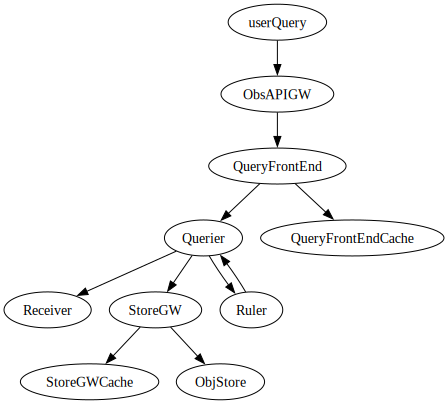

In [2]:
acmobsReadPath=graphviz.Digraph()
acmobsReadPath.edge('userQuery','ObsAPIGW')
acmobsReadPath.edge('ObsAPIGW','QueryFrontEnd')
acmobsReadPath.edge('QueryFrontEnd','Querier')
acmobsReadPath.edge('QueryFrontEnd','QueryFrontEndCache')
acmobsReadPath.edge('Querier','Receiver')
acmobsReadPath.edge('Querier','StoreGW')
acmobsReadPath.edge('StoreGW','StoreGWCache')
acmobsReadPath.edge('StoreGW','ObjStore')
acmobsReadPath.edge('Querier','Ruler')
acmobsReadPath.edge('Ruler','Querier')
acmobsReadPath

#### Write Path

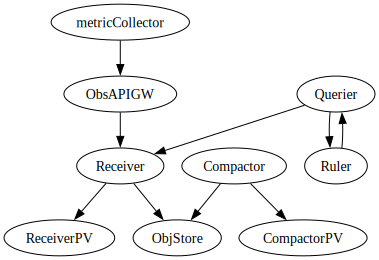

In [3]:
acmobsWritePath=graphviz.Digraph()
acmobsWritePath.edge('metricCollector','ObsAPIGW')
acmobsWritePath.edge('ObsAPIGW','Receiver')
acmobsWritePath.edge('Receiver','ObjStore')
acmobsWritePath.edge('Receiver','ReceiverPV')
acmobsWritePath.edge('Compactor','ObjStore')
acmobsWritePath.edge('Compactor','CompactorPV')
acmobsWritePath.edge('Ruler','Querier')
acmobsWritePath.edge('Querier','Ruler')
acmobsWritePath.edge('Querier','Receiver')
acmobsWritePath

#### Compactor

Reference: [Existing Thanos Alerts](https://github.com/thanos-io/thanos/blob/main/mixin/alerts/compact.libsonnet)

- ACM does not have all of these alerts.
- Also alert - 1 is not relevant for ACM

|Number|Alert|Meaning|
|---:|:---|:---|
|1|ThanosCompactMultipleRunning|Thanos Compact has multiple instances running.|
|2|ThanosCompactHalted|Thanos Compact is now halted|
|3|ThanosCompactHighCompactionFailures|Thanos Compact is failing to execute compactions.|
|4|ThanosCompactBucketHighOperationFailures|Thanos Compact Bucket is having a high number of operation failures.|
|5|ThanosCompactHasNotRun|Thanos Compact has not uploaded anything for last 24 hours|

Notice - all of these are excellent symptoms. It does not explain why these happened.

__compactor-health is a vector__

<!--
$\vec(V) = \begin{bmatrix} X \\\ Y \end{bmatrix}$
$\mathbf{V} = \begin{bmatrix} X \\\ Y \end{bmatrix}$
- $compactor-health = \mathbf{f}(is-todo-compaction-growing^1,is-compacting-halted,is-compactor-out-ofspace,is-there-a-bad-block)$
-->

$\mathbf{compactor-health} = \begin{bmatrix} ThanosCompactHalted \\\ ThanosCompactHighCompactionFailure \\\ ThanosCompactBucketHighOperationFailures| \\\ ThanosCompactHasNotRun  \end{bmatrix}$

*This is powerful metric - should we ignore this: is-todo-compaction-growing*

A causal model looks like - 

<!--
$compactor-health = \mathbf{f}(is-compactor-out-ofspace,is-there-a-bad-block)$
-->
$\mathbf{compactor-health} = \mathbf{f}(is-compactor-out-ofspace,is-there-a-bad-block)$


A bad compactor is a train wreck waiting to happen. This can quickly snowball into lot more issues if not taken care off right away.
  

#### Receiver

Reference: [Existing Thanos Alerts](https://github.com/thanos-io/thanos/blob/main/mixin/alerts/receive.libsonnet)

- ACM does not have all of these alerts.
- Also alert - 10 is not relevant for ACM

|Number|Alert|Meaning|
|---:|:---|:---|
|1|ThanosReceiveHttpRequestErrorRateHigh|Thanos Receive is failing to handle requests.|
|2|ThanosReceiveHttpRequestLatencyHigh|Thanos Receive has high HTTP requests latency.|
|3|ThanosReceiveHighReplicationFailures|Thanos Receive is having high number of replication failures.|
|4|ThanosReceiveHighForwardRequestFailures|Thanos Receive is failing to forward requests.|
|5|ThanosReceiveHighHashringFileRefreshFailures|Thanos Receive is failing to refresh hasring file.|
|6|ThanosReceiveConfigReloadFailure|Thanos Receive has not been able to reload configuration.|
|7|ThanosReceiveNoUpload|Thanos Receive has not uploaded latest data to object storage.|
|8|ThanosReceiveTenantLimitedByHeadSeries|A Thanos Receive tenant is limited by head series.|

Notice - all of these are excellent symptoms. It does not explain why these happened.

__receiver-health is a vector__

$\mathbf{receiver-health} = \begin{bmatrix} ThanosReceiveHttpRequestErrorRateHigh \\\ ThanosReceiveHttpRequestLatencyHigh \\\ ThanosReceiveHighReplicationFailures \\\ ThanosReceiveHighForwardRequestFailures \\\ ThanosReceiveHighHashringFileRefreshFailures \\\ ThanosReceiveConfigReloadFailure \\\ ThanosReceiveNoUpload \\\ ThanosReceiveTenantLimitedByHeadSeries  \end{bmatrix}$


A causal model looks like - 

$\mathbf{receiver-health} = \mathbf{f}(number-of-managed-clusters, time-series-per-cluster, number-of-receiver-replicas)$


#### Querier

Reference: [Existing Thanos Alerts](https://github.com/thanos-io/thanos/blob/main/mixin/alerts/query.libsonnet)

- ACM does not have all of these alerts today.


|Number|Alert|Meaning|
|---:|:---|:---|
|1|ThanosQueryHttpRequestQueryErrorRateHigh|Thanos Query is failing to handle requests.|
|2|ThanosQueryHttpRequestQueryRangeErrorRateHigh|Thanos Query is failing to handle requests.|
|3|ThanosQueryGrpcServerErrorRate|Thanos Query is failing to handle requests.|
|4|ThanosQueryGrpcClientErrorRate|Thanos Query is failing to send requests.|
|5|ThanosQueryHighDNSFailures|Thanos Query is having high number of DNS failures.|
|6|ThanosQueryInstantLatencyHigh|Thanos Query has high latency for queries.|
|7|ThanosQueryRangeLatencyHigh|Thanos Query has high latency for queries.|
|8|ThanosQueryOverload|Thanos query reaches its maximum capacity serving concurrent requests.|



Notice - all of these are excellent symptoms. It does not explain why these happened.

__querier-health is a vector__

$\mathbf{querier-health} = \begin{bmatrix} ThanosQueryHttpRequestQueryErrorRateHigh \\\ ThanosQueryHttpRequestQueryRangeErrorRateHigh \\\ ThanosQueryGrpcServerErrorRate \\\ ThanosQueryGrpcClientErrorRate \\\ ThanosQueryHighDNSFailures \\\ ThanosQueryInstantLatencyHigh \\\ ThanosQueryRangeLatencyHigh \\\ ThanosQueryOverload \\\   \end{bmatrix}$


A causal model looks like - 

$\mathbf{querier-health} = \mathbf{f}(number-of-time-series-per-query, number-of-simaltaneous-queries, number-of-querie-replicas, receiver-health)$


#### Ruler

Reference: [Existing Thanos Alerts](https://github.com/thanos-io/thanos/blob/main/mixin/alerts/rule.libsonnet)

- ACM does not have all of these alerts today.


|Number|Alert|Meaning|
|---:|:---|:---|
|1|ThanosRuleQueueIsDroppingAlerts|Thanos Rule is failing to queue alerts.|
|2|ThanosRuleSenderIsFailingAlerts|Thanos Rule is failing to send alerts to alertmanager.|
|3|ThanosRuleHighRuleEvaluationFailures|Thanos Rule is failing to evaluate rules.|
|4|ThanosRuleHighRuleEvaluationWarnings|Thanos Rule has high number of evaluation warnings.|
|5|ThanosRuleRuleEvaluationLatencyHigh|Thanos Rule has high rule evaluation latency.|
|6|ThanosRuleGrpcErrorRate|Thanos Rule is failing to handle grpc requests.|
|7|ThanosRuleConfigReloadFailure|Thanos Rule has not been able to reload configuration.|
|8|ThanosRuleQueryHighDNSFailures|Thanos Rule is having high number of DNS failures.|
|9|ThanosRuleAlertmanagerHighDNSFailures|Thanos Rule is having high number of DNS failures.|
|10|ThanosRuleNoEvaluationFor10Intervals|Thanos Rule has rule groups that did not evaluate for 10 intervals.^1|
|11|ThanosNoRuleEvaluations|Thanos Rule did not perform any rule evaluations.|


Notice - all of these are excellent symptoms. It does not explain why these happened.

__ruler-health is a vector__

$\mathbf{ruler-health} = \begin{bmatrix} ThanosRuleQueueIsDroppingAlerts \\\ ThanosRuleSenderIsFailingAlerts \\\ ThanosRuleHighRuleEvaluationFailures \\\ ThanosRuleHighRuleEvaluationWarnings \\\ ThanosRuleRuleEvaluationLatencyHigh \\\ ThanosRuleGrpcErrorRate \\\ ThanosRuleConfigReloadFailure \\\ ThanosRuleQueryHighDNSFailures \\\ ThanosRuleAlertmanagerHighDNSFailures \\\ ThanosRuleNoEvaluationFor10Intervals \\\ ThanosNoRuleEvaluations   \end{bmatrix}$


A causal model looks like - 

$\mathbf{ruler-health} = \mathbf{f}(number-of-rules, number-of-timeseries, number-of-simaltaneous-queries, number-of-querie-replicas,querier-health)$

Note -
1. This alert will give false positive if no rules are configured.

#### Store Gateway

Reference: [Existing Thanos Alerts](https://github.com/thanos-io/thanos/blob/main/mixin/alerts/store.libsonnet)

- ACM does not have all of these alerts today.


|Number|Alert|Meaning|
|---:|:---|:---|
|1|ThanosStoreGrpcErrorRate|Thanos Store is failing to handle gRPC requests.|
|2|ThanosStoreSeriesGateLatencyHigh|Thanos Store has high latency for store series gate requests.|
|3|ThanosStoreBucketHighOperationFailures|Thanos Store Bucket is failing to execute operations.|
|4|ThanosStoreObjstoreOperationLatencyHigh|Thanos Store is having high latency for bucket operations.|


Notice - all of these are excellent symptoms. It does not explain why these happened.

__storegw-health is a vector__

$\mathbf{storegw-health} = \begin{bmatrix} ThanosStoreGrpcErrorRate \\\ ThanosStoreSeriesGateLatencyHigh \\\ ThanosStoreBucketHighOperationFailures \\\ ThanosStoreObjstoreOperationLatencyHigh   \end{bmatrix}$


A causal model looks like - 

$\mathbf{storegw-health} = \mathbf{f}(history-configuration, number-of-timeseries, number-of-simaltaneous-queries)$

#### Observatorium API Gateway

### GRC

ACM GRC has many components -

1. Policy Propagator on the Hub
1. Spec Sync Controller on the Managed cluster
1. Status Sync Controller on the Managed cluster
1. Policy Controllers on the managed cluster
1. Kube API Server on the Hub
1. Kube API Server on the managed cluster

However, we must consider the health in lenses of what a user of the system sees. The user sees the effect when they try to `Create a Policy` or during/for `Policy Status Updates`.



#### Policy Creation Flow

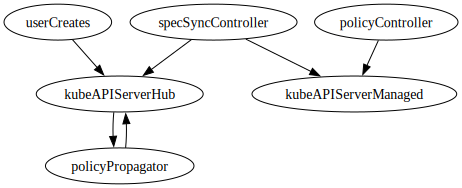

In [4]:
acmpolicycreation=graphviz.Digraph()
acmpolicycreation.edge('userCreates','kubeAPIServerHub')
acmpolicycreation.edge('kubeAPIServerHub','policyPropagator')
acmpolicycreation.edge('policyPropagator','kubeAPIServerHub')
acmpolicycreation.edge('specSyncController','kubeAPIServerHub')
acmpolicycreation.edge('specSyncController','kubeAPIServerManaged')
acmpolicycreation.edge('policyController','kubeAPIServerManaged')
acmpolicycreation

#### Policy Status Updates

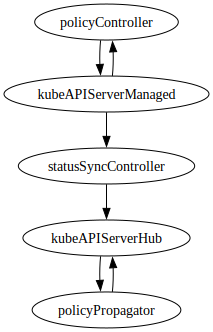

In [5]:
acmpolicystatusupdate=graphviz.Digraph()
acmpolicystatusupdate.edge('policyController','kubeAPIServerManaged')
acmpolicystatusupdate.edge('kubeAPIServerManaged','policyController')
acmpolicystatusupdate.edge('kubeAPIServerManaged','statusSyncController')
acmpolicystatusupdate.edge('statusSyncController','kubeAPIServerHub')
acmpolicystatusupdate.edge('kubeAPIServerHub','policyPropagator')
acmpolicystatusupdate.edge('policyPropagator','kubeAPIServerHub')
acmpolicystatusupdate

#### Policy Propagator

*ACM does not have alerts to monitor status of this yet. But there are good metrics from which we can calculate the warning signs*




#### Spec Sync Controller

#### Status Sync Controller

#### Policy Controller

# WIP Below - IGNORE FOR NOW

### Kube API /Etcd Server

- $KubeAPI-size-health^3 = \mathbf{f}(apiserver-latency^1, apiserver-errorrate^1, Etcd-health, frequency-of-resource-change, number-of-get-requests,total-resources-created)$
- $total-resources-created = \mathbf{f}(number-of-managed-clusters, acm-features-enabled, acm-release)^4$
- $number-of-get-requests = \mathbf{f}(number-of-managed-clusters, acm-features-enabled, acm-release)^4$
- $Etcd-health = \mathbf{f}(etcd-latency^1,etcd_errorrate^1,cpu-starvation, network-latency, disk-latency, total-resources-created, frequency-of-resource-change)$

Notes:

1. These are symptoms aka effects (of causes). This is also how we measure/know if there is a problem or not.
1.  